## Grid search with ROC-AUC and average precision score

Definition of hyper-parameters $\theta^L$ for statistical learning methods is usually based on the estimation of errors or performance metrics through validation procedures, after which the best hyper-parameter vector $\theta^{L*}$ among a grid of different alternatives is selected from optimizing the validated error or performance metric.
<br>
When this methodology is referenced by a performance metric instead of error measures, a choice among different performance metrics should be previously done. When the statistical learning problem is a classification one, the choice is especially blurred, since there are several different possibilities. Considering the simplest context of a binary classification, ROC-AUC, precision-recall AUC, and average precision score are the main performance metrics to be considered.
<br>
Given the high correlation between precision-recall AUC and average precision score, and then defining the last one as a representative of both, which of the following should be picked: *ROC-AUC or average precision score*?
<br>
<br>
After estimating a set of models, for a given collection of datasets and one for each learning method explored so far (logistic regression and GBM), their outcomes will be used here to provide comparisons between the best hyper-parameter choice and the associated value of performance metric for those two alternatives, namely, ROC-AUC and average precision score.
<br>
The objectives of this study are summarized as follows:
1. The first objective is to assess changes in the output of grid search as one uses ROC-AUC instead of average precision score as the performance metric of reference. This can be done either by measuring the frequency of divergences or by calculating statistics for the difference in best hyper-parameter values.
<br>
<br>
2. A last goal is to assess how much the estimated generalization capacity of the models varies between those two options of best hyper-parameters choice, using for this the K-folds CV for implementing grid search and later a train-test estimation in order to calculate performance metrics for final comparison.

It is crucial to clarify that there is no desired answers for the questions that arise from these experiments. This because, even if ROC-AUC and average precision score diverge, the definition of which metric is the most appropriate depends highly on theoretical discussions to be explored in the future. Note also that the tests whose results are presented below have limitations toward their generalization. From beyond specificities in data generation processes, only two learning methods are explored, and only one hyper-parameter per method is defined through grid search, while GBM, for instance, has at least three further relevant hyper-parameters.

**Note:** comparing best hyper-parameters from a learning method $L$ from a dataset $s$ means checking $\hat{\theta}_{roc}^{L,s}$ against $\hat{\theta}_{avg-prec}^{L,s}$, where the first is chosen from grid search based on ROC-AUC and the second follows from grid search using average precision score.
<br>
**Note:** similarly, comparing performance metrics opposes ROC-AUC$_{roc}$ to ROC-AUC$_{avg-prec}$, and $Avg\_prec\_score_{roc}$ to $Avg\_prec\_score_{avg-prec}$, where subscripts $roc$ and $avg$-$prec$ indicate which metric of performance based the choice of hyper-parameter, respectively ROC-AUC and average precision score.

-----------------

#### Main conclusions<a id='main_conclusions'></a>

1. Correlation among performance metrics (either using outcomes from [logistic regression](#correlation_lr)<a href='#correlation_lr'></a> or [GBM](#correlation_gbm)<a href='#correlation_gbm'></a>).
    * There are high correlations between ROC-AUC and different performance metrics, both precision scores (average precision score and precision-recall AUC - positive correlation) and cost functions (binomial deviance and Brier score - negative correlation). The correlation is particularly high with average precision score.
    * Correlation near 1 between average precision score and precision-recall AUC.
<br>
<br>
2. [Logistic regression](#comp_lr)<a href='#comp_lr'></a>: there is no major divergences between grid search implemented using ROC-AUC or using average precision score for choosing best regularization parameter of logistic regression. One may have some concerng, however, when modeling small datasets. In this case, it would be convenient to apply two grid searches (one based on ROC-AUC and the other on average precision score) whenever is possible, and then to compare performance metrics evaluated on test set. The same applies, more generally, when classification task is particularly difficult.
    * From all datasets, almost a half (49%) has chosen the same hyper-parameter value irrespective of using ROC-AUC or average precision score as the metric of reference for grid search.
    * Consistent choices by ROC-AUC and average precision score are likely to happen to larger datasets than divergent choices.
        * [Reference 1](#reference1)<a href='reference1'></a>: histogram with distribution of the number of observations by status of equal best hyper-parameter.
    * Datasets with equal best hyper-parameter between grid searches using ROC-AUC or average precision score have better performance on average.
        * [Reference 2](#reference2)<a href='reference2'></a>: box plots with distribution of test ROC-AUC and test average precision score against the status of equal best hyper-parameter.
        * [Reference 3](#reference3)<a href='reference3'></a>: correlation between same choice and performance metrics.
    * Average hyper-parameter chosen by average precision score is twice larger than that for ROC-AUC.
        * [Reference 4](#reference4)<a href='reference4'></a>: box plots with distribution of best hyper-parameter against criterium of choice via grid search.
    * Relatively big differences (absolute or not) between the value of hyper-parameter chosen based on ROC-AUC or average precision score. Still, the box plot of (non-absolute) differences shows that they concentrate over low values (0.15-0.2) when outliers are dropped. Moreover, there is a high negative correlation between absolute difference in the best hyper-parameter choice and the number of observations.
        * [Reference 5](#reference5)<a href='reference5'></a>: statistics and boxplots.
    * Datasets with divergente choices have better average performance when grid search is based on average precision score, even when analyzing test ROC-AUC. Considering the whole distribution of test average precision score, though, there is high similarity between both criteria of grid search.
        * [Reference 6](#reference6)<a href='reference6'></a>: box plots of test ROC-AUC and test average precision score against criterium used during grid search.
    * Yet, comparing performance metrics for both criteria, and given dataset sizes, it can be seen a random distribution of values along the $y = x$ line (reference 7), showing no pattern of colors (which reference dataset sizes) and no pattern of position above or below the $y = x$ line.
		* [Reference 7](#reference7)<a href='reference7'></a>: scatter plot opposing performance metrics for both grid search criteria.
<br>
<br>
3. [GBM](#comp_gbm)<a href='#comp_gbm'></a>: outcomes from grid searches for choosing the best value of max depth hyper-parameter in GBM are highly similar for both metrics of reference explored, ROC-AUC and average precision score.
    * For only 35% of datasets there is consistency in best hyper-parameter choice.
    * Datasets with equal best hyper-parameters across grid searches using ROC-AUC and average precision score show better performance.
		* [Reference 8](#reference8)<a href='reference8'></a>: box plots of test ROC-AUC and test average precision score against status of equality in choice of hyper-parameter values.
    * The distribution of chosen values when there is divergence in choice is pretty similar between the two criteria. While the non-absolute difference is small, the average absolute difference is a little higher. There is a high negative correlation between absolute difference and dataset sizes.
		* [Reference 9](#reference9)<a href='reference9'></a>: statistics and box plot of best hyper-parameter for both criteria.
    * The similarity in distribution of best hyper-parameter values translates into also similar performance metrics on test set.
		* [Reference 10](#reference10)<a href='reference10'></a>: box plots for performance metrics against the criterium used during grid search, and scatterplots comparing metrics obtained through both criteria.

-----------

**Summary:**
1. [Libraries](#libraries)<a href='#libraries'></a>.
2. [Functions](#functions)<a href='#functions'></a>.
3. [Importing data](#imports)<a href='#imports'></a>.
4. [Logistic regression](#comp_lr)<a href='#comp_lr'></a>.
    * [Processing data](#proc_data_lr)<a href='#proc_data_lr'></a>.
    * [Correlation between performance metrics](#correlation_lr)<a href='#correlation_lr'></a>.
    * [Comparing outcomes from grid searches](#comp_outcomes_lr)<a href='#comp_outcomes_lr'></a>.
    * [Comparing outcomes for divergent best hyper-parameters](#comp_outcomes_div_lr)<a href='#comp_outcomes_div_lr'></a>.
<br>
<br>
5. [GBM](#comp_gbm)<a href='#comp_gbm'></a>.
    * [Processing data](#proc_data_gbm)<a href='#proc_data_gbm'></a>.
    * [Correlation between performance metrics](#correlation_gbm)<a href='#correlation_gbm'></a>.
    * [Comparing outcomes from grid searches](#comp_outcomes_gbm)<a href='#comp_outcomes_gbm'></a>.
    * [Comparing outcomes for divergent best hyper-parameters](#comp_outcomes_div_gbm)<a href='#comp_outcomes_div_gbm'></a>.

<a id='libraries'></a>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import cufflinks as cf
init_notebook_mode(connected=True)
# cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id='functions'></a>

## Functions

In [2]:
# Function that classifies datasets according to their sizes:
def dataset_size(x, reference):
    if(x < np.quantile(reference, q=0.33)):
        return "small"
    elif(np.quantile(reference, q=0.33) <= x < np.quantile(reference, q=0.67)):
        return "medium"
    elif(x >= np.quantile(reference, q=0.67)):
        return "large"

In [3]:
# Function that defines color marks as a function of dataset size:
def set_color(x):
    if x == 'small':
        return "#f6a159"
    elif x == 'medium':
        return "#00a1df"
    elif x == 'large':
        return "#201710"

<a id='imports'></a>

## Importing data

### Performance metrics

In [4]:
# Outcomes from logistic regression estimations:
with open('../Datasets/tun_C.json') as json_file:
    tun_C = json.load(json_file)
    
with open('../Datasets/LR_grid_search_roc_auc.json') as json_file:
    LR_grid_search_roc = json.load(json_file)

with open('../Datasets/LR_grid_search_avg_precision_score.json') as json_file:
    LR_grid_search_prec = json.load(json_file)
    
# Outcomes from GBM estimations:
with open('../Datasets/tun_subsample.json') as json_file:
    tun_subsample = json.load(json_file)
    
tun_max_depth = {}
with open('../Datasets/tun_max_depth_500.json') as json_file:
    tun_max_depth['500'] = json.load(json_file)

with open('../Datasets/GBM_grid_search_roc_auc.json') as json_file:
    GBM_grid_search_roc = json.load(json_file)

with open('../Datasets/GBM_grid_search_avg_precision_score.json') as json_file:
    GBM_grid_search_prec = json.load(json_file)

### Dataset information

In [5]:
stores = []
n_orders = []
n_vars = []
avg_y = []

# Additional datasets information:
with open('../Datasets/data_info_dict.json') as json_file:
    data_info_dict = json.load(json_file)

# Loop over datasets:
for s in tun_subsample.keys():
    stores.append(int(s))
    n_orders.append(int(tun_subsample[s]['n_orders']))
    n_vars.append(int(tun_subsample[s]['n_vars']))
    avg_y.append(data_info_dict[s]['avg_y'])

data_info = pd.DataFrame(data={'store_id': stores, 'n_orders': n_orders, 'n_vars': n_vars, 'avg_y': avg_y})
print('\033[1mShape of data_info:\033[0m ' + str(data_info.shape) + '.')
data_info.head()

Shape of data_info: (100, 4).


,store_id,n_orders,n_vars,avg_y
0,11729,2570,1596,0.037354
1,10311,1999,2534,0.014007
2,7988,1077,3051,0.082637
3,4736,945,2393,0.048677
4,3481,4378,2545,0.013020


<a id='comp_lr'></a>

## Logistic regression

The outcomes from logistic regression model estimation follows from grid-search to define the regularization parameter $\lambda$ (denoted $C$ in sklearn library). The grid explored through K-folds CV estimations has 14 different values for $\lambda$: $\{0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.25, 0.3, 0.5, 0.75, 1.0, 3.0, 10.0\}$. After choosing the best hyper-parameter value, the model was re-fitted using the entire training data, and performance metrics were evaluated on the test data. The estimations were performed using 100 different datasets whose response variable was binary.

<a id='proc_data_lr'></a>

### Processing data

In [6]:
not_consider = [6106, 4408, 7845, 1549, 7790, 5939, 4636, 8421, 7062, 6714, 7630, 5860, 1210, 6971]
selected_stores = [s for s in LR_grid_search_roc.keys() if int(s) not in not_consider]

LR_grid_search = pd.DataFrame(data={
    "store_id": [int(s) for s in selected_stores],
    "best_param_roc": [float(LR_grid_search_roc[s]['best_param'].split(': ')[1].split('}')[0]) for s in
                       selected_stores],
    "best_param_prec": [float(LR_grid_search_prec[s]['best_param'].split(': ')[1].split('}')[0]) for s in
                        selected_stores],
    "test_roc_auc_roc": [LR_grid_search_roc[s]['test_roc_auc'] for s in selected_stores],
    "test_roc_auc_prec": [LR_grid_search_prec[s]['test_roc_auc'] for s in selected_stores],
    "test_prec_avg_roc": [LR_grid_search_roc[s]['test_prec_avg'] for s in selected_stores],
    "test_prec_avg_prec": [LR_grid_search_prec[s]['test_prec_avg'] for s in selected_stores]
})

LR_grid_search = data_info.merge(LR_grid_search, how='right', on='store_id')
LR_grid_search['n_orders'] = LR_grid_search.n_orders.apply(lambda x: int(x/2))
LR_grid_search['n_orders_scaled'] = LR_grid_search.n_orders.apply(lambda x: x/max(LR_grid_search.n_orders))

print('\033[1mShape of LR_grid_search:\033[0m ' + str(LR_grid_search.shape) + '.')
LR_grid_search.head()

Shape of LR_grid_search: (86, 11).


,store_id,n_orders,n_vars,avg_y,best_param_roc,best_param_prec,test_roc_auc_roc,test_roc_auc_prec,test_prec_avg_roc,test_prec_avg_prec,n_orders_scaled
0,11729,1285,1596,0.037354,0.1,0.75,0.859003,0.810967,0.232440,0.177916,0.040180
1,10311,999,2534,0.014007,0.5,1.00,0.741494,0.743133,0.029403,0.030196,0.031237
2,7988,538,3051,0.082637,0.1,0.10,0.674082,0.674174,0.162779,0.162800,0.016822
3,4736,472,2393,0.048677,0.5,0.50,0.991943,0.991943,0.824040,0.824214,0.014759
4,3481,2189,2545,0.013020,0.1,10.00,0.779057,0.740928,0.062317,0.130180,0.068447


<a id='correlation_lr'></a>

### Correlation between performance metrics

In [7]:
# Dataframe for correlating different performance metrics:
stores = []
test_roc_auc = []
test_prec_avg = []
test_pr_auc = []
test_deviance_neg = []
test_brier_score_neg = []

# Loop over datasets:
for s in tun_C.keys():
    stores.append(int(s))
    
    # Best hyper-parameter (according with test ROC-AUC):
    roc_auc = list(tun_C[s]['test_roc_auc'].values())
    best_key = list(tun_C[s]['test_roc_auc'].keys())[roc_auc.index(max(roc_auc))]

    # Performance metrics associated with best hyper-parameter:
    test_roc_auc.append(tun_C[s]['test_roc_auc'][best_key])
    test_prec_avg.append(tun_C[s]['test_prec_avg'][best_key])
    test_pr_auc.append(tun_C[s]['test_pr_auc'][best_key])
    test_deviance_neg.append(-tun_C[s]['test_deviance'][best_key])
    test_brier_score_neg.append(-tun_C[s]['test_brier_score'][best_key])

# Dataframe with performance metrics by dataset:
metrics_LR = pd.DataFrame(data={
    'store_id': stores,
    'test_roc_auc': test_roc_auc,
    'test_prec_avg': test_prec_avg,
    'test_pr_auc': test_pr_auc,
    'test_deviance_neg': test_deviance_neg,
    'test_brier_score_neg': test_brier_score_neg
})

print('\033[1mShape of metrics_LR:\033[0m ' + str(metrics_LR.shape) + '.')
metrics_LR.head()

Shape of metrics_LR: (100, 6).


,store_id,test_roc_auc,test_prec_avg,test_pr_auc,test_deviance_neg,test_brier_score_neg
0,11729,0.860717,0.261281,0.255241,-883.688819,-0.036629
1,10311,0.759262,0.056166,0.042485,-692.790592,-0.011738
2,7988,0.675689,0.163174,0.155672,-368.546870,-0.072928
3,4736,0.992715,0.840471,0.834750,-320.272547,-0.016298
4,3481,0.789703,0.089113,0.076277,-1515.658151,-0.009110


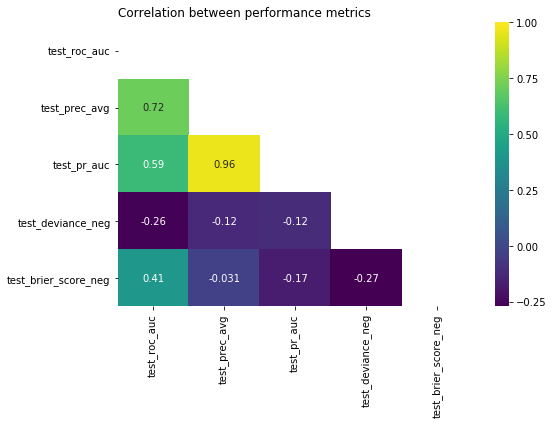

In [8]:
# Generate a mask for the upper triangle:
mask = np.triu(np.ones_like(metrics_LR.drop('store_id', axis=1).corr(), dtype=np.bool))

plt.figure(figsize=(8,6))
sns.heatmap(metrics_LR.drop('store_id', axis=1).corr(), mask = mask, annot = True, cmap = 'viridis')
plt.title('Correlation between performance metrics', loc='left')
plt.tight_layout()

<a id='comp_outcomes_lr'></a>

### Comparing outcomes from grid searches

<a id='comp_best_param_lr'></a>

#### Comparing best hyper-parameters

In [9]:
# Dummy variable indicating whether best hyper-parameter is equal for both grid search criteria:
LR_grid_search['equal_best_param'] = LR_grid_search[['best_param_roc',
                                                     'best_param_prec']].apply(lambda x: 1 if x['best_param_roc']==x['best_param_prec'] else 0,
                                                                               axis=1)

# Difference between best hyper-parameters according to each grid search criterium:
LR_grid_search['diff_best_param'] = [i-j for i, j in zip(LR_grid_search['best_param_roc'].to_list(),
                                                          LR_grid_search['best_param_prec'].to_list())]
LR_grid_search['abs_diff_best_param'] = LR_grid_search['diff_best_param'].apply(lambda x: abs(x))

print('\033[1mDistribution of equality (equal_best_param = 1) in best hyper-parameter choice:\033[0m')
LR_grid_search.equal_best_param.value_counts()/len(LR_grid_search)

Distribution of equality (equal_best_param = 1) in best hyper-parameter choice:


0    0.511628
1    0.488372
Name: equal_best_param, dtype: float64

<a id='desc_equality_best_param_lr'></a>

#### Describing equality of best hyper-parameters

In [10]:
print('\033[1mStatistics for datasets information and performance metrics by equal_best_param status:\033[0m')
LR_grid_search.drop('store_id', axis=1).groupby('equal_best_param').mean().transpose()

Statistics for datasets information and performance metrics by equal_best_param status:


equal_best_param,0,1
n_orders,3496.250000,4312.142857
n_vars,2367.113636,2376.904762
avg_y,0.061612,0.044854
best_param_roc,0.927045,1.242857
best_param_prec,2.007955,1.242857
test_roc_auc_roc,0.875031,0.894475
test_roc_auc_prec,0.880733,0.894038
test_prec_avg_roc,0.476382,0.559734
test_prec_avg_prec,0.485818,0.560118
n_orders_scaled,0.109323,0.134835


<a id='reference1'></a>

Distribution of number of observations by equal_best_param status:


Text(0.0, 1.0, 'equal_best_param = 1')

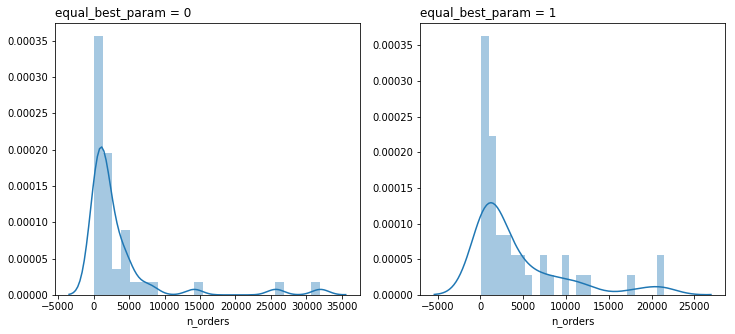

In [11]:
# Distribution of number of observations by equality of best hyper-parameter:
print('\033[1mDistribution of number of observations by equal_best_param status:\033[0m')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot(LR_grid_search[LR_grid_search.equal_best_param==0].n_orders, ax=axs[0], bins=25)
sns.distplot(LR_grid_search[LR_grid_search.equal_best_param==1].n_orders, ax=axs[1], bins=25)

axs[0].set_title('equal_best_param = 0', loc='left')
axs[1].set_title('equal_best_param = 1', loc='left')

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

Distribution of average response variable by equal_best_param status:


Text(0.0, 1.0, 'equal_best_param = 1')

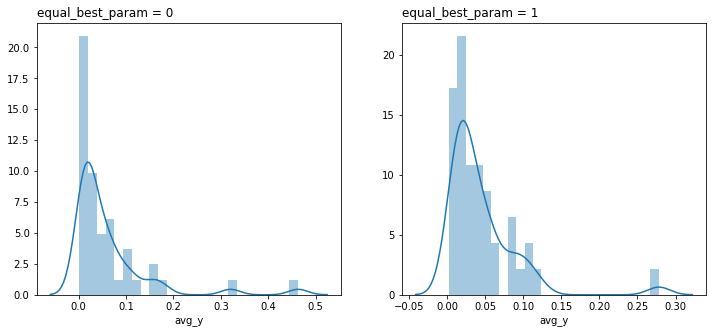

In [12]:
# Distribution of average response variable by equality of best hyper-parameter:
print('\033[1mDistribution of average response variable by equal_best_param status:\033[0m')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot(LR_grid_search[LR_grid_search.equal_best_param==0].avg_y, ax=axs[0], bins=25)
sns.distplot(LR_grid_search[LR_grid_search.equal_best_param==1].avg_y, ax=axs[1], bins=25)

axs[0].set_title('equal_best_param = 0', loc='left')
axs[1].set_title('equal_best_param = 1', loc='left')

<a id='reference2'></a>

In [13]:
# Boxplots for the distribution of outcomes by equality of best hyper-parameter:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Number of obs", "Test ROC-AUC", "Test average precision score"))

# First plot:
fig.add_trace(
    go.Box(x=LR_grid_search['equal_best_param'], y=LR_grid_search['n_orders'], name='n_obs'),
    row=1, col=1, secondary_y=False)

# Second plot:
fig.add_trace(
    go.Box(x=LR_grid_search['equal_best_param'], y=LR_grid_search['test_roc_auc_roc'], name='roc_auc'),
    row=1, col=2, secondary_y=False)

# Third plot:
fig.add_trace(
    go.Box(x=LR_grid_search['equal_best_param'], y=LR_grid_search['test_prec_avg_prec'], name='test_prec_avg'),
    row=1, col=3, secondary_y=False)

# Changing layout:
fig.update_layout(
    title_text='Outcomes by equality in best hyper-parameter',
    width=1000,
    height=500,
    showlegend=False
)

# Changing axes:
fig.update_xaxes(title_text="equal_best_param", row=1, col=1)
fig.update_xaxes(title_text="equal_best_param", row=1, col=2)
fig.update_xaxes(title_text="equal_best_param", row=1, col=3)

fig.show()

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

<a id='reference3'></a>

In [14]:
# Correlation between outcomes and the equality of best hyper-parameter:
corr_plot = LR_grid_search.drop('store_id',
                                axis=1).corr()[['equal_best_param']].sort_values('equal_best_param').iloc[0:-1]
corr_plot.index.name = 'x'
corr_plot.reset_index(inplace=True)

px.bar(data_frame=corr_plot, x='x', y='equal_best_param',
       color_discrete_sequence=['#0b6fab'],
       width=800, height=450,
       labels={'equal_best_param': 'correlation', 'x': 'outcome'},
       title='Correlation between outcomes and equal_best_param')

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

<a id='comp_outcomes_div_lr'></a>

### Comparing outcomes for divergent best hyper-parameters

In [15]:
# Dataframe with outcomes for divergent choices of best hyper-parameter:
LR_div = LR_grid_search[LR_grid_search.equal_best_param==0]
LR_div['dataset_size'] = LR_div.n_orders_scaled.apply(dataset_size, reference=LR_div.n_orders_scaled)

print('\033[1mShape of LR_div:\033[0m ' + str(LR_div.shape) + '.')
LR_div.head()

Shape of LR_div: (44, 15).


C:\Users\Acer\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,store_id,n_orders,n_vars,avg_y,best_param_roc,best_param_prec,test_roc_auc_roc,test_roc_auc_prec,test_prec_avg_roc,test_prec_avg_prec,n_orders_scaled,equal_best_param,diff_best_param,abs_diff_best_param,dataset_size
0,11729,1285,1596,0.037354,0.10,0.75,0.859003,0.810967,0.232440,0.177916,0.040180,0,-0.65,0.65,medium
1,10311,999,2534,0.014007,0.50,1.00,0.741494,0.743133,0.029403,0.030196,0.031237,0,-0.50,0.50,medium
4,3481,2189,2545,0.013020,0.10,10.00,0.779057,0.740928,0.062317,0.130180,0.068447,0,-9.90,9.90,medium
5,4838,31981,2017,0.007864,0.03,0.25,0.972732,0.967567,0.596616,0.638153,1.000000,0,-0.22,0.22,large
6,5848,622,2986,0.028135,0.25,1.00,0.933333,0.856214,0.299597,0.321725,0.019449,0,-0.75,0.75,small


<a id='comp_diff_best_param_lr'></a>

#### Comparing different best hyper-parameters

In [16]:
print('\033[1mStatistics for best hyper-parameters for each grid search criterium:\033[0m')
LR_div[['best_param_roc', 'best_param_prec']].describe().transpose()

Statistics for best hyper-parameters for each grid search criterium:


,count,mean,std,min,25%,50%,75%,max
best_param_roc,44.0,0.927045,2.096722,0.03,0.2125,0.25,0.75,10.0
best_param_prec,44.0,2.007955,3.548091,0.10,0.2500,0.40,1.00,10.0


<a id='reference4'></a>

In [17]:
# Dataframes with best hyper-parameter by criterium of grid search:
best_param_roc = pd.DataFrame(data={'crit': ['roc_auc' for i in range(len(LR_div))],
                                    'best_param': LR_div['best_param_roc'].to_list()}) 
best_param_prec = pd.DataFrame(data={'crit': ['avg_prec_score' for i in range(len(LR_div))],
                                     'best_param': LR_div['best_param_prec'].to_list()}) 
best_param = pd.concat([best_param_roc, best_param_prec], axis=0, sort=False)

# Boxplot for the distribution of best hyper-parameter for each criterium of grid search:
px.box(data_frame=best_param, x='crit', y='best_param',
       color_discrete_sequence=['#0b6fab'],
       width=800, height=450,
       labels={'best_param': 'best hyper-parameter', 'crit': 'criterium'},
       title='Distribution of best hyper-parameter by criterium of grid search')

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

<a id='assess_diff_best_param_lr'></a>

#### Assessing differences in best hyper-parameter choice

<a id='reference5'></a>

In [18]:
print('\033[1mStatistics for differences in best hyper-parameter choice between grid search criteria:\033[0m')
LR_div[['diff_best_param', 'abs_diff_best_param']].describe().transpose()

Statistics for differences in best hyper-parameter choice between grid search criteria:


,count,mean,std,min,25%,50%,75%,max
diff_best_param,44.0,-1.080909,4.103686,-9.90,-0.50,-0.15,0.1625,9.0
abs_diff_best_param,44.0,2.194545,3.620462,0.05,0.15,0.25,1.1875,9.9


In [19]:
# Boxplot for the distribution of differences in best hyper-parameter choice:
px.box(y=LR_div.diff_best_param,
       color_discrete_sequence=['#0b6fab'],
       width=800, height=450,
       labels={'y': 'diff_best_param'},
       title='Distribution of differences in best hyper-parameter choice')

In [20]:
print('\033[1mCorrelation between differences in best hyper-parameter choice and number of observations:\033[0m')
LR_div[['n_orders', 'diff_best_param', 'abs_diff_best_param']].corr()

Correlation between differences in best hyper-parameter choice and number of observations:


,n_orders,diff_best_param,abs_diff_best_param
n_orders,1.000000,0.044458,-0.170759
diff_best_param,0.044458,1.000000,-0.517367
abs_diff_best_param,-0.170759,-0.517367,1.000000


[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

<a id='comp_metrics_lr'></a>

#### Comparing performance metrics

<a id='reference6'></a>

In [21]:
# Dataframes with test ROC-AUC by criterium of grid search:
metrics_roc = pd.DataFrame(data={'crit': ['roc_auc' for i in range(len(LR_div))],
                                 'test_roc_auc': LR_div['test_roc_auc_roc'].to_list()}) 
metrics_prec = pd.DataFrame(data={'crit': ['avg_prec_score' for i in range(len(LR_div))],
                                           'test_roc_auc': LR_div['test_roc_auc_prec'].to_list()})
metrics = pd.concat([metrics_roc, metrics_prec], axis=0, sort=False)

# Dataframes with test average precision score by criterium of grid search:
metrics_roc = pd.DataFrame(data={'crit': ['roc_auc' for i in range(len(LR_div))],
                                 'test_prec_avg': LR_div['test_prec_avg_roc'].to_list()}) 
metrics_prec = pd.DataFrame(data={'crit': ['avg_prec_score' for i in range(len(LR_div))],
                                  'test_prec_avg': LR_div['test_prec_avg_prec'].to_list()}) 
metrics = metrics.merge(pd.concat([metrics_roc, metrics_prec], axis=0, sort=False), on='crit', how='inner')

# Boxplots for the distribution of performance metrics for each criterium of grid search:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Test ROC-AUC", "Test average precision score"))

# First plot:
fig.add_trace(
    go.Box(
    x=metrics['crit'], y=metrics['test_roc_auc']
    ), row=1, col=1
)

# Second plot:
fig.add_trace(
    go.Box(
    x=metrics['crit'], y=metrics['test_prec_avg']
    ), row=1, col=2
)

# Changing layout:
fig.update_layout(
    title_text='Distribution of performance metrics by criterium of grid search',
    width=900, height=500,
    showlegend=False
)

# Changing axes:
fig.update_xaxes(title_text = 'Criterium', row=1, col=1)
fig.update_xaxes(title_text = 'Criterium', row=1, col=2)

fig.show()

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

<a id='reference7'></a>

In [22]:
# Textual information:
print('\033[1mDatasets with larger test ROC-AUC:\033[0m')
print('Grid search using average precision score = ' +
      str(sum(LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec < 0)) + ' (' +
      str(round((sum(LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec < 0)/len(LR_div))*100, 2)) + ')%')
print('\n')
print('\033[1mDatasets with larger test average precision score:\033[0m')
print('Grid search using average precision score = ' +
      str(sum(LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec < 0)) + ' (' +
      str(round((sum(LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec < 0)/len(LR_div))*100, 2)) + ')%')
print('\n')
print('Datasets for which grid search using average precision score is better for both metrics: ' +
      str(len(LR_div[(LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec < 0) &
                     (LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec < 0)])) + ' (' +
      str(round((len(LR_div[(LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec < 0) &
                            (LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec < 0)])/len(LR_div))*100)) +
      '%).')
print('Datasets for which grid search using ROC-AUC is better for both metrics: ' +
      str(len(LR_div[(LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec > 0) &
                     (LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec > 0)])) + ' (' +
      str(round((len(LR_div[(LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec > 0) &
                            (LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec > 0)])/len(LR_div))*100)) +
      '%).')

# Scatter plots comparing performance metrics when each criterium is used in grid search:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Test ROC-AUC", "Test average precision score"))

# First plot:
fig.add_trace(
    go.Scatter(
    x=LR_div.test_roc_auc_roc, y=LR_div.test_roc_auc_prec, mode='markers',
    marker=dict(color=list(map(set_color,LR_div.dataset_size))),
    hovertemplate = 'test_roc_auc_prec = %{y:.4f}<br>' +
                    'test_roc_auc_roc = %{x:.4f}<br>' +
                    '%{text}<br>',
    text = ['dataset_size = {}'.format(i) for i in LR_div.dataset_size]
    ), row=1, col=1
)

# Add straight line y = x:
fig.add_shape(
    # Line Diagonal
    type="line",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="black", width=1, dash="solid"), row=1, col=1
)

# Second plot:
fig.add_trace(
    go.Scatter(
    x=LR_div.test_prec_avg_roc, y=LR_div.test_prec_avg_prec, mode='markers',
    marker=dict(color=list(map(set_color, LR_div.dataset_size))),
    hovertemplate = 'test_prec_avg_prec = %{y:.4f}<br>' +
                    'test_prec_avg_roc = %{x:.4f}<br>' +
                    '%{text}<br>',
    text = ['dataset_size = {}'.format(i) for i in LR_div.dataset_size]
    ), row=1, col=2
)

# Add straight line y = x:
fig.add_shape(
    # Line Diagonal
    type="line",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="black", width=1, dash="solid"), row=1, col=2
)

# Changing layout:
fig.update_layout(
    title_text='Comparing performance metrics by criterium of grid search',
    width=900, height=500,
    showlegend=False
)

# Changing axes:
fig.update_xaxes(title_text = 'Using ROC-AUC', range=[0.55, 1], row=1, col=1)
fig.update_yaxes(title_text = 'Using avg precision score', range=[0.55, 1], row=1, col=1)
fig.update_xaxes(title_text = 'Using ROC-AUC', row=1, col=2)
fig.update_yaxes(title_text = 'Using avg precision score', row=1, col=2)

fig.show()

Datasets with larger test ROC-AUC:
Grid search using average precision score = 24 (54.55)%


Datasets with larger test average precision score:
Grid search using average precision score = 24 (54.55)%


Datasets for which grid search using average precision score is better for both metrics: 17 (39%).
Datasets for which grid search using ROC-AUC is better for both metrics: 13 (30%).


[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

Average number of observations:
When average precision score leads to better ROC-AUC: 2075.
When ROC-AUC leads to better ROC-AUC: 5200.


Average number of observations:
When average precision score leads to better average precision score: 3660.
When ROC-AUC leads to better average precision score: 3299.




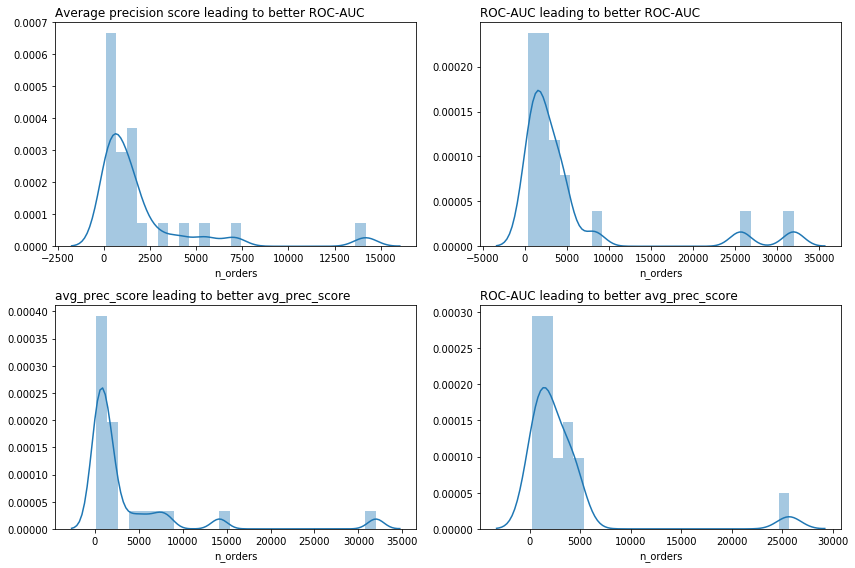

In [23]:
# Textual information:
print('\033[1mAverage number of observations:\033[0m')
print('When average precision score leads to better ROC-AUC: '+ 
      str(int(LR_div[LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec < 0].n_orders.mean())) + '.')
print('When ROC-AUC leads to better ROC-AUC: '+ 
      str(int(LR_div[LR_div.test_roc_auc_roc - LR_div.test_roc_auc_prec > 0].n_orders.mean())) + '.')
print('\n')
print('\033[1mAverage number of observations:\033[0m')
print('When average precision score leads to better average precision score: '+ 
      str(int(LR_div[LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec < 0].n_orders.mean())) + '.')
print('When ROC-AUC leads to better average precision score: '+ 
      str(int(LR_div[LR_div.test_prec_avg_roc - LR_div.test_prec_avg_prec > 0].n_orders.mean())) + '.')
print('\n')

# Distribution of number of observations by criterium of grid search producing better results for each metric:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.distplot(LR_div[LR_div.test_roc_auc_prec > LR_div.test_roc_auc_roc].n_orders, ax=axs[0][0], bins=25)
sns.distplot(LR_div[LR_div.test_roc_auc_prec < LR_div.test_roc_auc_roc].n_orders, ax=axs[0][1], bins=25)
sns.distplot(LR_div[LR_div.test_prec_avg_prec > LR_div.test_prec_avg_roc].n_orders, ax=axs[1][0], bins=25)
sns.distplot(LR_div[LR_div.test_prec_avg_prec < LR_div.test_prec_avg_roc].n_orders, ax=axs[1][1], bins=25)

axs[0][0].set_title('Average precision score leading to better ROC-AUC', loc='left')
axs[0][1].set_title('ROC-AUC leading to better ROC-AUC', loc='left')
axs[1][0].set_title('avg_prec_score leading to better avg_prec_score', loc='left')
axs[1][1].set_title('ROC-AUC leading to better avg_prec_score', loc='left')

plt.tight_layout()

<a id='comp_gbm'></a>

## GBM

The outcomes from GBM estimation follows from grid-search to define the regularization parameter $\max\_depth$, the maximum number of splits in the threes composing the ensemble. The grid explored through K-folds CV estimations has 5 different values for $\max\_depth$: $\{1, 2, 3, 4, 5\}$. The remaining most relevant hyper-parameters were defined as follows: $\eta = 1$, $v = 0.1$, and $n\_estimators = 500$. After choosing the best hyper-parameter value, the model was re-fitted using the entire training data, and performance metrics were evaluated on the test data. The estimations were performed using 100 different datasets whose response variable was binary.

<a id='proc_data_gbm'></a>

### Processing data

In [24]:
not_consider = [6106, 4408, 7845, 1549, 7790, 5939, 4636, 8421, 7062, 6714, 7630, 5860, 1210, 6971]
selected_stores = [s for s in GBM_grid_search_roc.keys() if int(s) not in not_consider]

GBM_grid_search = pd.DataFrame(data={
    "store_id": [int(s) for s in selected_stores],
    "best_param_roc": [float(GBM_grid_search_roc[s]['best_param'].split("'max_depth':")[1].split(',')[0]) for s in
                       selected_stores],
    "best_param_prec": [float(GBM_grid_search_prec[s]['best_param'].split("'max_depth':")[1].split(',')[0]) for s in
                        selected_stores],
    "test_roc_auc_roc": [GBM_grid_search_roc[s]['test_roc_auc'] for s in selected_stores],
    "test_roc_auc_prec": [GBM_grid_search_prec[s]['test_roc_auc'] for s in selected_stores],
    "test_prec_avg_roc": [GBM_grid_search_roc[s]['test_prec_avg'] for s in selected_stores],
    "test_prec_avg_prec": [GBM_grid_search_prec[s]['test_prec_avg'] for s in selected_stores]
})

GBM_grid_search = data_info.merge(GBM_grid_search, how='right', on='store_id')
GBM_grid_search['n_orders'] = GBM_grid_search.n_orders.apply(lambda x: int(x/2))
GBM_grid_search['n_orders_scaled'] = GBM_grid_search.n_orders.apply(lambda x: x/max(GBM_grid_search.n_orders))

print('\033[1mShape of GBM_grid_search:\033[0m ' + str(GBM_grid_search.shape) + '.')
GBM_grid_search.head()

Shape of GBM_grid_search: (86, 11).


,store_id,n_orders,n_vars,avg_y,best_param_roc,best_param_prec,test_roc_auc_roc,test_roc_auc_prec,test_prec_avg_roc,test_prec_avg_prec,n_orders_scaled
0,11729,1285,1596,0.037354,1.0,3.0,0.814890,0.797963,0.187773,0.177774,0.040180
1,10311,999,2534,0.014007,5.0,2.0,0.820691,0.843876,0.028585,0.025879,0.031237
2,7988,538,3051,0.082637,3.0,1.0,0.559458,0.568962,0.093635,0.091379,0.016822
3,4736,472,2393,0.048677,4.0,3.0,0.935155,0.906457,0.625534,0.609428,0.014759
4,3481,2189,2545,0.013020,3.0,3.0,0.757869,0.716772,0.040406,0.058736,0.068447


<a id='correlation_gbm'></a>

### Correlation between performance metrics

In [25]:
# Dataframe with performance metrics by dataset:
metrics_GBM = pd.DataFrame(data={
    'store_id': [int(s) for s in tun_subsample.keys() if np.isnan(tun_subsample[s]['test_roc_auc']['0.75']) == False],
    'test_roc_auc': [tun_subsample[s]['test_roc_auc']['0.75'] for s in tun_subsample.keys() if np.isnan(tun_subsample[s]['test_roc_auc']['0.75']) == False],
    'test_prec_avg': [tun_subsample[s]['test_prec_avg']['0.75'] for s in tun_subsample.keys() if np.isnan(tun_subsample[s]['test_prec_avg']['0.75']) == False],
    'test_pr_auc': [tun_subsample[s]['test_pr_auc']['0.75'] for s in tun_subsample.keys() if np.isnan(tun_subsample[s]['test_pr_auc']['0.75']) == False],
    'test_deviance_neg': [-tun_subsample[s]['test_deviance']['0.75'] for s in tun_subsample.keys() if np.isnan(tun_subsample[s]['test_deviance']['0.75']) == False],
    'test_brier_score_neg': [-tun_subsample[s]['test_brier_score']['0.75'] for s in tun_subsample.keys() if np.isnan(tun_subsample[s]['test_brier_score']['0.75']) == False]
})

print('\033[1mShape of metrics_GBM:\033[0m ' + str(metrics_GBM.shape) + '.')
metrics_GBM.head()

Shape of metrics_GBM: (97, 6).


,store_id,test_roc_auc,test_prec_avg,test_pr_auc,test_deviance_neg,test_brier_score_neg
0,11729,0.801276,0.191084,0.184379,-885.512767,-0.043436
1,10311,0.799521,0.023465,0.019710,-693.145870,-0.008808
2,7988,0.563636,0.091626,0.087912,-372.231960,-0.096923
3,4736,0.921247,0.628839,0.624813,-322.896852,-0.027266
4,3481,0.729311,0.039222,0.032138,-1517.080351,-0.008447


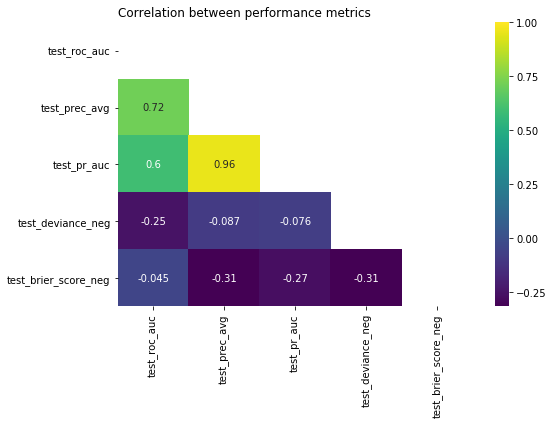

In [26]:
# Generate a mask for the upper triangle:
mask = np.triu(np.ones_like(metrics_GBM.drop('store_id', axis=1).corr(), dtype=np.bool))

plt.figure(figsize=(8,6))
sns.heatmap(metrics_GBM.drop('store_id', axis=1).corr(), mask = mask, annot = True, cmap = 'viridis')
plt.title('Correlation between performance metrics', loc='left')
plt.tight_layout()

<a id='comp_outcomes_gbm'></a>

### Comparing outcomes from grid searches

<a id='comp_best_param_gbm'></a>

#### Comparing best hyper-parameters

In [27]:
# Difference between best hyper-parameters according to each grid search criterium:
GBM_grid_search['diff_best_param'] = [i-j for i, j in zip(GBM_grid_search['best_param_roc'].to_list(),
                                                          GBM_grid_search['best_param_prec'].to_list())]
GBM_grid_search['abs_diff_best_param'] = GBM_grid_search['diff_best_param'].apply(lambda x: abs(x))

# Dummy variable indicating whether best hyper-parameter is equal for both grid search criteria:
GBM_grid_search['equal_best_param'] = GBM_grid_search['abs_diff_best_param'].apply(lambda x: 1 if x == 0 else 0)

print('\033[1mDistribution of equality (equal_best_param = 1) in best hyper-parameter choice:\033[0m')
GBM_grid_search.equal_best_param.value_counts()/len(GBM_grid_search)

Distribution of equality (equal_best_param = 1) in best hyper-parameter choice:


0    0.651163
1    0.348837
Name: equal_best_param, dtype: float64

<a id='desc_equality_best_param_gbm'></a>

#### Describing equality of best hyper-parameters

In [28]:
print('\033[1mStatistics for datasets information and performance metrics by equal_best_param status:\033[0m')
GBM_grid_search.drop('store_id', axis=1).groupby('equal_best_param').mean().transpose()

Statistics for datasets information and performance metrics by equal_best_param status:


equal_best_param,0,1
n_orders,3981.732143,3732.266667
n_vars,2352.535714,2408.033333
avg_y,0.055314,0.049906
best_param_roc,3.053571,2.333333
best_param_prec,3.125000,2.333333
test_roc_auc_roc,0.859142,0.890776
test_roc_auc_prec,0.854429,0.894240
test_prec_avg_roc,0.406553,0.518349
test_prec_avg_prec,0.417285,0.523594
n_orders_scaled,0.124503,0.116703


Distribution of number of observations by equal_best_param status:


Text(0.0, 1.0, 'equal_best_param = 1')

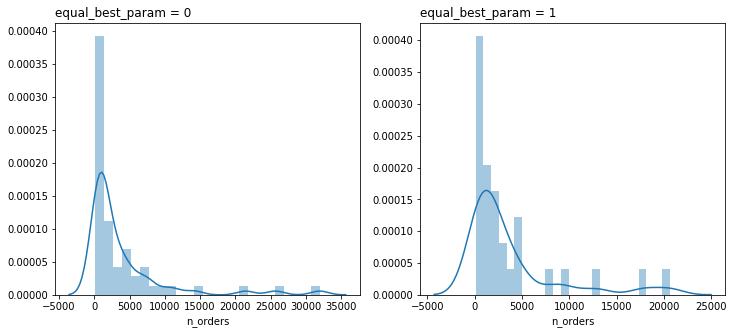

In [29]:
# Distribution of number of observations by equality of best hyper-parameter:
print('\033[1mDistribution of number of observations by equal_best_param status:\033[0m')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot(GBM_grid_search[GBM_grid_search.equal_best_param==0].n_orders, ax=axs[0], bins=25)
sns.distplot(GBM_grid_search[GBM_grid_search.equal_best_param==1].n_orders, ax=axs[1], bins=25)

axs[0].set_title('equal_best_param = 0', loc='left')
axs[1].set_title('equal_best_param = 1', loc='left')

Distribution of average response variable by equal_best_param status:


Text(0.0, 1.0, 'equal_best_param = 1')

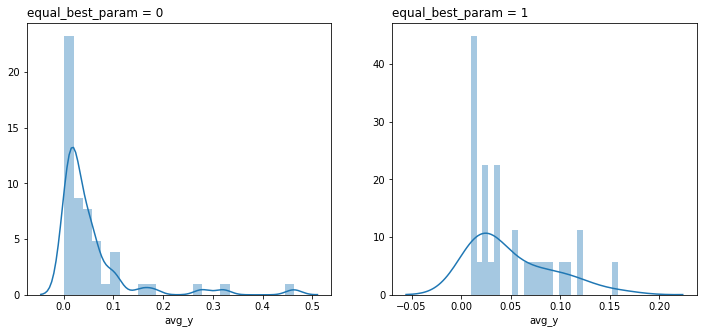

In [30]:
# Distribution of average response variable by equality of best hyper-parameter:
print('\033[1mDistribution of average response variable by equal_best_param status:\033[0m')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot(GBM_grid_search[GBM_grid_search.equal_best_param==0].avg_y, ax=axs[0], bins=25)
sns.distplot(GBM_grid_search[GBM_grid_search.equal_best_param==1].avg_y, ax=axs[1], bins=25)

axs[0].set_title('equal_best_param = 0', loc='left')
axs[1].set_title('equal_best_param = 1', loc='left')

<a id='reference8'></a>

In [31]:
# Boxplots for the distribution of outcomes by equality of best hyper-parameter:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Number of obs", "Test ROC-AUC", "Test average precision score"))

# First plot:
fig.add_trace(
    go.Box(x=GBM_grid_search['equal_best_param'], y=GBM_grid_search['n_orders'], name='n_obs'),
    row=1, col=1, secondary_y=False)

# Second plot:
fig.add_trace(
    go.Box(x=GBM_grid_search['equal_best_param'], y=GBM_grid_search['test_roc_auc_roc'], name='roc_auc'),
    row=1, col=2, secondary_y=False)

# Third plot:
fig.add_trace(
    go.Box(x=GBM_grid_search['equal_best_param'], y=GBM_grid_search['test_prec_avg_prec'], name='test_prec_avg'),
    row=1, col=3, secondary_y=False)

# Changing layout:
fig.update_layout(
    title_text='Outcomes by equality in best hyper-parameter',
    width=1000,
    height=500,
    showlegend=False
)

# Changing axes:
fig.update_xaxes(title_text="equal_best_param", row=1, col=1)
fig.update_xaxes(title_text="equal_best_param", row=1, col=2)
fig.update_xaxes(title_text="equal_best_param", row=1, col=3)

fig.show()

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

In [32]:
# Correlation between outcomes and the equality of best hyper-parameter:
corr_plot = GBM_grid_search.drop('store_id',
                                axis=1).corr()[['equal_best_param']].sort_values('equal_best_param').iloc[0:-1]
corr_plot.index.name = 'x'
corr_plot.reset_index(inplace=True)

px.bar(data_frame=corr_plot, x='x', y='equal_best_param',
       color_discrete_sequence=['#0b6fab'],
       width=800, height=450,
       labels={'equal_best_param': 'correlation', 'x': 'outcome'},
       title='Correlation between outcomes and equal_best_param')

<a id='comp_outcomes_div_gbm'></a>

### Comparing outcomes for divergent best hyper-parameters

In [33]:
# Dataframe with outcomes for divergent choices of best hyper-parameter:
GBM_div = GBM_grid_search[GBM_grid_search.equal_best_param==0]
GBM_div['dataset_size'] = GBM_div.n_orders_scaled.apply(dataset_size, reference=GBM_div.n_orders_scaled)

print('\033[1mShape of GBM_div:\033[0m ' + str(GBM_div.shape) + '.')
GBM_div.head()

Shape of GBM_div: (56, 15).


C:\Users\Acer\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,store_id,n_orders,n_vars,avg_y,best_param_roc,best_param_prec,test_roc_auc_roc,test_roc_auc_prec,test_prec_avg_roc,test_prec_avg_prec,n_orders_scaled,diff_best_param,abs_diff_best_param,equal_best_param,dataset_size
0,11729,1285,1596,0.037354,1.0,3.0,0.814890,0.797963,0.187773,0.177774,0.040180,-2.0,2.0,0,medium
1,10311,999,2534,0.014007,5.0,2.0,0.820691,0.843876,0.028585,0.025879,0.031237,3.0,3.0,0,medium
2,7988,538,3051,0.082637,3.0,1.0,0.559458,0.568962,0.093635,0.091379,0.016822,2.0,2.0,0,small
3,4736,472,2393,0.048677,4.0,3.0,0.935155,0.906457,0.625534,0.609428,0.014759,1.0,1.0,0,small
5,4838,31981,2017,0.007864,3.0,2.0,0.969864,0.961477,0.532135,0.523301,1.000000,1.0,1.0,0,large


<a id='comp_diff_best_param_gbm'></a>

#### Comparing different best hyper-parameters

<a id='reference9'></a>

In [34]:
print('\033[1mStatistics for best hyper-parameters for each grid search criterium:\033[0m')
GBM_div[['best_param_roc', 'best_param_prec']].describe().transpose()

Statistics for best hyper-parameters for each grid search criterium:


,count,mean,std,min,25%,50%,75%,max
best_param_roc,56.0,3.053571,1.354046,1.0,2.0,3.0,4.0,5.0
best_param_prec,56.0,3.125000,1.322016,1.0,2.0,3.0,4.0,5.0


In [35]:
# Dataframes with best hyper-parameter by criterium of grid search:
best_param_roc = pd.DataFrame(data={'crit': ['roc_auc' for i in range(len(GBM_div))],
                                    'best_param': GBM_div['best_param_roc'].to_list()}) 
best_param_prec = pd.DataFrame(data={'crit': ['avg_prec_score' for i in range(len(GBM_div))],
                                     'best_param': GBM_div['best_param_prec'].to_list()}) 
best_param = pd.concat([best_param_roc, best_param_prec], axis=0, sort=False)

# Boxplot for the distribution of best hyper-parameter for each criterium of grid search:
px.box(data_frame=best_param, x='crit', y='best_param',
       color_discrete_sequence=['#0b6fab'],
       width=800, height=450,
       labels={'best_param': 'best hyper-parameter', 'crit': 'criterium'},
       title='Distribution of best hyper-parameter by criterium of grid search')

[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

<a id='assess_diff_best_param_gbm'></a>

#### Assessing differences in best hyper-parameter choice

In [36]:
print('\033[1mStatistics for differences in best hyper-parameter choice between grid search criteria:\033[0m')
GBM_div[['diff_best_param', 'abs_diff_best_param']].describe().transpose()

Statistics for differences in best hyper-parameter choice between grid search criteria:


,count,mean,std,min,25%,50%,75%,max
diff_best_param,56.0,-0.071429,1.797545,-4.0,-1.0,-1.0,1.0,4.0
abs_diff_best_param,56.0,1.571429,0.849752,1.0,1.0,1.0,2.0,4.0


In [37]:
# Boxplot for the distribution of differences in best hyper-parameter choice:
px.box(y=GBM_div.diff_best_param,
       color_discrete_sequence=['#0b6fab'],
       width=800, height=450,
       labels={'y': 'diff_best_param'},
       title='Distribution of differences in best hyper-parameter choice')

In [38]:
print('\033[1mCorrelation between differences in best hyper-parameter choice and number of observations:\033[0m')
GBM_div[['n_orders', 'diff_best_param', 'abs_diff_best_param']].corr()

Correlation between differences in best hyper-parameter choice and number of observations:


,n_orders,diff_best_param,abs_diff_best_param
n_orders,1.000000,0.010946,-0.248747
diff_best_param,0.010946,1.000000,0.193853
abs_diff_best_param,-0.248747,0.193853,1.000000


<a id='comp_metrics_gbm'></a>

#### Comparing performance metrics

<a id='reference10'></a>

In [39]:
# Dataframes with test ROC-AUC by criterium of grid search:
metrics_roc = pd.DataFrame(data={'crit': ['roc_auc' for i in range(len(GBM_div))],
                                 'test_roc_auc': GBM_div['test_roc_auc_roc'].to_list()}) 
metrics_prec = pd.DataFrame(data={'crit': ['avg_prec_score' for i in range(len(GBM_div))],
                                           'test_roc_auc': GBM_div['test_roc_auc_prec'].to_list()})
metrics = pd.concat([metrics_roc, metrics_prec], axis=0, sort=False)

# Dataframes with test average precision score by criterium of grid search:
metrics_roc = pd.DataFrame(data={'crit': ['roc_auc' for i in range(len(GBM_div))],
                                 'test_prec_avg': GBM_div['test_prec_avg_roc'].to_list()}) 
metrics_prec = pd.DataFrame(data={'crit': ['avg_prec_score' for i in range(len(GBM_div))],
                                  'test_prec_avg': GBM_div['test_prec_avg_prec'].to_list()}) 
metrics = metrics.merge(pd.concat([metrics_roc, metrics_prec], axis=0, sort=False), on='crit', how='inner')

# Boxplots for the distribution of performance metrics for each criterium of grid search:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Test ROC-AUC", "Test average precision score"))

# First plot:
fig.add_trace(
    go.Box(
    x=metrics['crit'], y=metrics['test_roc_auc']
    ), row=1, col=1
)

# Second plot:
fig.add_trace(
    go.Box(
    x=metrics['crit'], y=metrics['test_prec_avg']
    ), row=1, col=2
)

# Changing layout:
fig.update_layout(
    title_text='Distribution of performance metrics by criterium of grid search',
    width=900, height=500,
    showlegend=False
)

# Changing axes:
fig.update_xaxes(title_text = 'Criterium', row=1, col=1)
fig.update_xaxes(title_text = 'Criterium', row=1, col=2)

fig.show()

In [40]:
# Textual information:
print('\033[1mDatasets with larger test ROC-AUC:\033[0m')
print('Grid search using average precision score = ' +
      str(sum(GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec < 0)) + ' (' +
      str(round((sum(GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec < 0)/len(GBM_div))*100, 2)) + ')%')
print('\n')
print('\033[1mDatasets with larger test average precision score:\033[0m')
print('Grid search using average precision score = ' +
      str(sum(GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec < 0)) + ' (' +
      str(round((sum(GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec < 0)/len(GBM_div))*100, 2)) + ')%')
print('\n')
print('Datasets for which grid search using average precision score is better for both metrics: ' +
      str(len(GBM_div[(GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec < 0) &
                     (GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec < 0)])) + ' (' +
      str(round((len(GBM_div[(GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec < 0) &
                            (GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec < 0)])/len(GBM_div))*100)) +
      '%).')
print('Datasets for which grid search using ROC-AUC is better for both metrics: ' +
      str(len(GBM_div[(GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec > 0) &
                     (GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec > 0)])) + ' (' +
      str(round((len(GBM_div[(GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec > 0) &
                            (GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec > 0)])/len(GBM_div))*100)) +
      '%).')

# Scatter plots comparing performance metrics when each criterium is used in grid search:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Test ROC-AUC", "Test average precision score"))

# First plot:
fig.add_trace(
    go.Scatter(
    x=GBM_div.test_roc_auc_roc, y=GBM_div.test_roc_auc_prec, mode='markers',
    marker=dict(color=list(map(set_color,GBM_div.dataset_size))),
    hovertemplate = 'test_roc_auc_prec = %{y:.4f}<br>' +
                    'test_roc_auc_roc = %{x:.4f}<br>' +
                    '%{text}<br>',
    text = ['dataset_size = {}'.format(i) for i in GBM_div.dataset_size]
    ), row=1, col=1
)

# Add straight line y = x:
fig.add_shape(
    # Line Diagonal
    type="line",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="black", width=1, dash="solid"), row=1, col=1
)

# Second plot:
fig.add_trace(
    go.Scatter(
    x=GBM_div.test_prec_avg_roc, y=GBM_div.test_prec_avg_prec, mode='markers',
    marker=dict(color=list(map(set_color, GBM_div.dataset_size))),
    hovertemplate = 'test_prec_avg_prec = %{y:.4f}<br>' +
                    'test_prec_avg_roc = %{x:.4f}<br>' +
                    '%{text}<br>',
    text = ['dataset_size = {}'.format(i) for i in GBM_div.dataset_size]
    ), row=1, col=2
)

# Add straight line y = x:
fig.add_shape(
    # Line Diagonal
    type="line",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="black", width=1, dash="solid"), row=1, col=2
)

# Changing layout:
fig.update_layout(
    title_text='Comparing performance metrics by criterium of grid search',
    width=900, height=500,
    showlegend=False
)

# Changing axes:
fig.update_xaxes(title_text = 'Using ROC-AUC', range=[0.55, 1], row=1, col=1)
fig.update_yaxes(title_text = 'Using avg precision score', range=[0.55, 1], row=1, col=1)
fig.update_xaxes(title_text = 'Using ROC-AUC', row=1, col=2)
fig.update_yaxes(title_text = 'Using avg precision score', row=1, col=2)

fig.show()

Datasets with larger test ROC-AUC:
Grid search using average precision score = 28 (50.0)%


Datasets with larger test average precision score:
Grid search using average precision score = 28 (50.0)%


Datasets for which grid search using average precision score is better for both metrics: 19 (34%).
Datasets for which grid search using ROC-AUC is better for both metrics: 18 (32%).


[Main conclusions](#main_conclusions)<a href='#main_conclusions'></a>

Average number of observations:
When average precision score leads to better ROC-AUC: 2830.
When ROC-AUC leads to better ROC-AUC: 5132.


Average number of observations:
When average precision score leads to better average precision score: 3076.
When ROC-AUC leads to better average precision score: 5161.




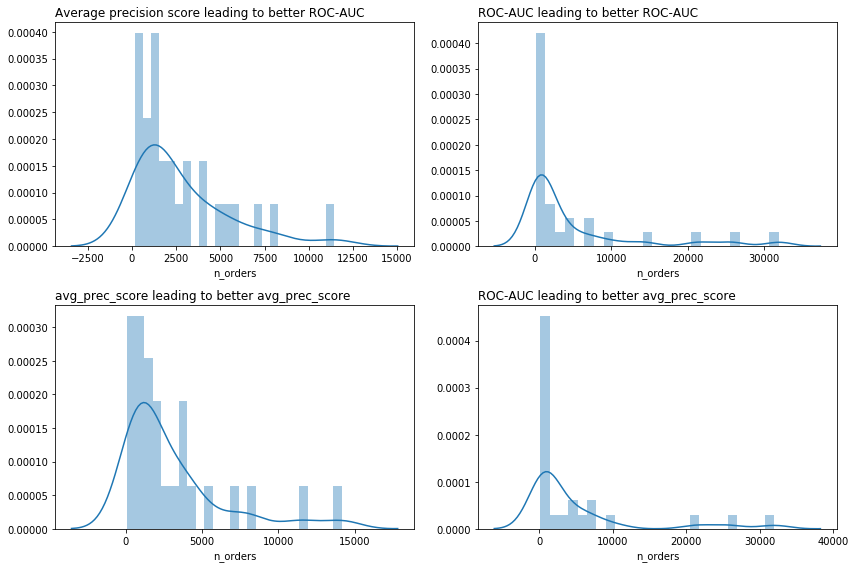

In [41]:
# Textual information:
print('\033[1mAverage number of observations:\033[0m')
print('When average precision score leads to better ROC-AUC: '+ 
      str(int(GBM_div[GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec < 0].n_orders.mean())) + '.')
print('When ROC-AUC leads to better ROC-AUC: '+ 
      str(int(GBM_div[GBM_div.test_roc_auc_roc - GBM_div.test_roc_auc_prec > 0].n_orders.mean())) + '.')
print('\n')
print('\033[1mAverage number of observations:\033[0m')
print('When average precision score leads to better average precision score: '+ 
      str(int(GBM_div[GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec < 0].n_orders.mean())) + '.')
print('When ROC-AUC leads to better average precision score: '+ 
      str(int(GBM_div[GBM_div.test_prec_avg_roc - GBM_div.test_prec_avg_prec > 0].n_orders.mean())) + '.')
print('\n')

# Distribution of number of observations by criterium of grid search producing better results for each metric:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.distplot(GBM_div[GBM_div.test_roc_auc_prec > GBM_div.test_roc_auc_roc].n_orders, ax=axs[0][0], bins=25)
sns.distplot(GBM_div[GBM_div.test_roc_auc_prec < GBM_div.test_roc_auc_roc].n_orders, ax=axs[0][1], bins=25)
sns.distplot(GBM_div[GBM_div.test_prec_avg_prec > GBM_div.test_prec_avg_roc].n_orders, ax=axs[1][0], bins=25)
sns.distplot(GBM_div[GBM_div.test_prec_avg_prec < GBM_div.test_prec_avg_roc].n_orders, ax=axs[1][1], bins=25)

axs[0][0].set_title('Average precision score leading to better ROC-AUC', loc='left')
axs[0][1].set_title('ROC-AUC leading to better ROC-AUC', loc='left')
axs[1][0].set_title('avg_prec_score leading to better avg_prec_score', loc='left')
axs[1][1].set_title('ROC-AUC leading to better avg_prec_score', loc='left')

plt.tight_layout()